# Full Dirichlet VPINN example

In [1]:
from mesh import *

from VPINN_tri_final import *

from PROBDEF import PROBDEF

import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)

tfk = tf.keras
tfkl = tf.keras.layers

# importing probdef 
pb = PROBDEF()

2023-11-30 04:15:13.780932: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 04:15:15.143390: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

generate mesh lib imported

interpolator_lib imported

settings_lib imported 




### Initialise mesh

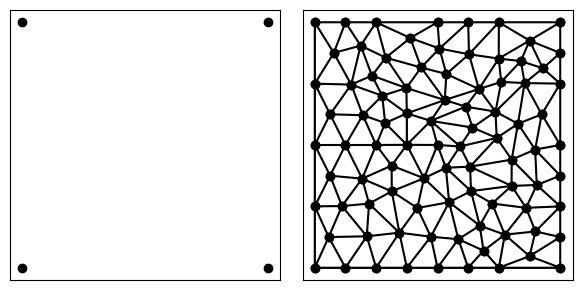

In [2]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=54)


# mesh init
domain = ((0, 0), (1, 0), (1, 1), (0, 1))
mesh = generate_mesh(domain, 0.01)

### Train boundary condition network

In [3]:
#net used for approximating the fully dirichlet bc  
bc_model = tfk.models.Sequential()
bc_model.add(tf.keras.Input(shape=(2,),dtype=tf_type))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tfkl.Dense(10, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
bc_model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

2023-11-30 04:15:18.642747: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
print(bc_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 371
Non-trainable params: 0
_________________________________________________________________
None


In [5]:
# setting model to the current net
model = bc_model


# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

In [6]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

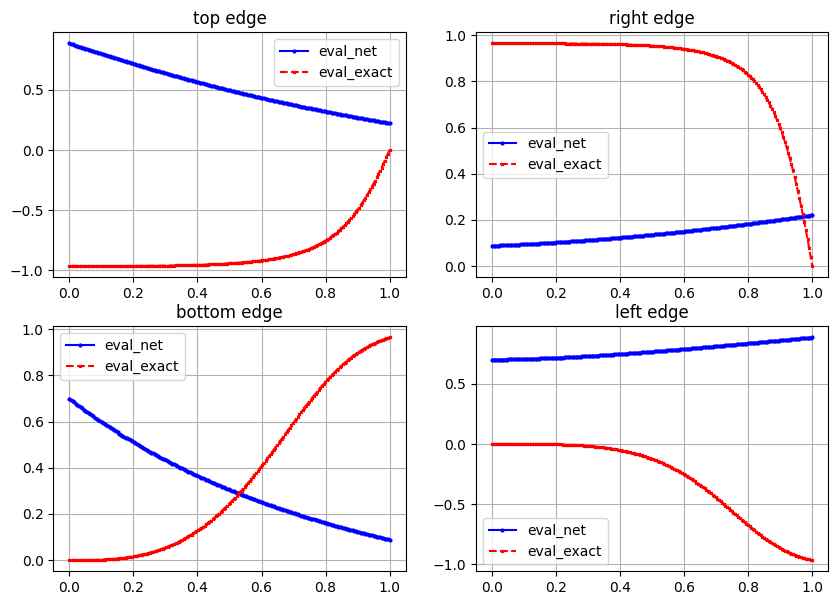

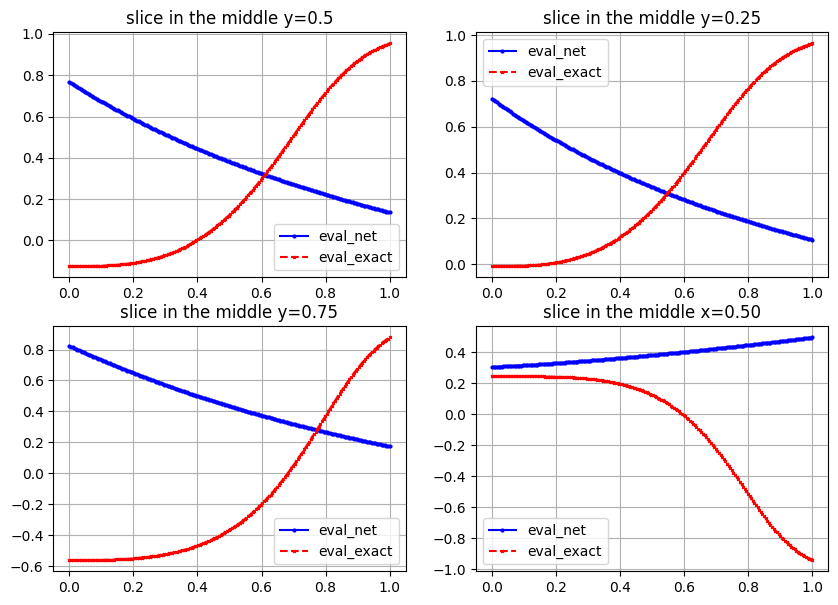

In [7]:
# Compare untrained model to the exact version
plot_BC(pb.u_exact_np,model_np)

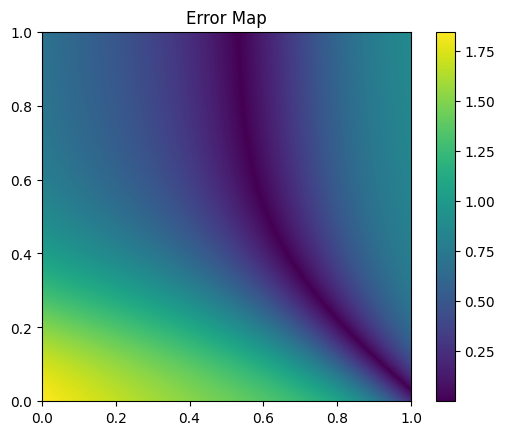

In [8]:
color_plot(bc_model)

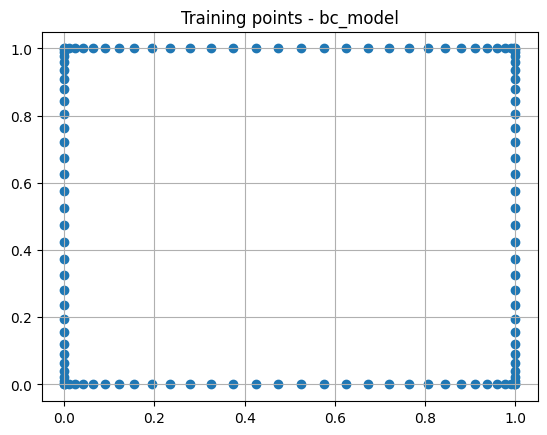

In [9]:
# Generate training data for the network
x = pb.generate_boundary_points(30, False)
plt.scatter(x[:, 0], x[:, 1])
plt.title("Training points - bc_model")
plt.grid()

y = pb.u_exact(x[:, 0], x[:, 1])
y = tf.reshape(y, (-1, 1))

In [10]:
# Training process of bc_model with the MSE as loss function 
custom_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
bc_model.compile(optimizer=custom_optimizer, loss='mean_squared_error')

history=model.fit(x, y, epochs=3000, batch_size=np.size(y))

Epoch 1/3000
1/1 [==============================] - 1s 1s/step - loss: 1.0634
Epoch 2/3000
1/1 [==============================] - 0s 10ms/step - loss: 1.0161
Epoch 3/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.9720
Epoch 4/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.9312
Epoch 5/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.8936
Epoch 6/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.8591
Epoch 7/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.8275
Epoch 8/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.7985
Epoch 9/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.7718
Epoch 10/3000
1/1 [==============================] - 0s 9ms/step - loss: 0.7472
Epoch 11/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.7243
Epoch 12/3000
1/1 [==============================] - 0s 10ms/step - loss: 0.7029
Epoch 13/3000
1/1 [===========================

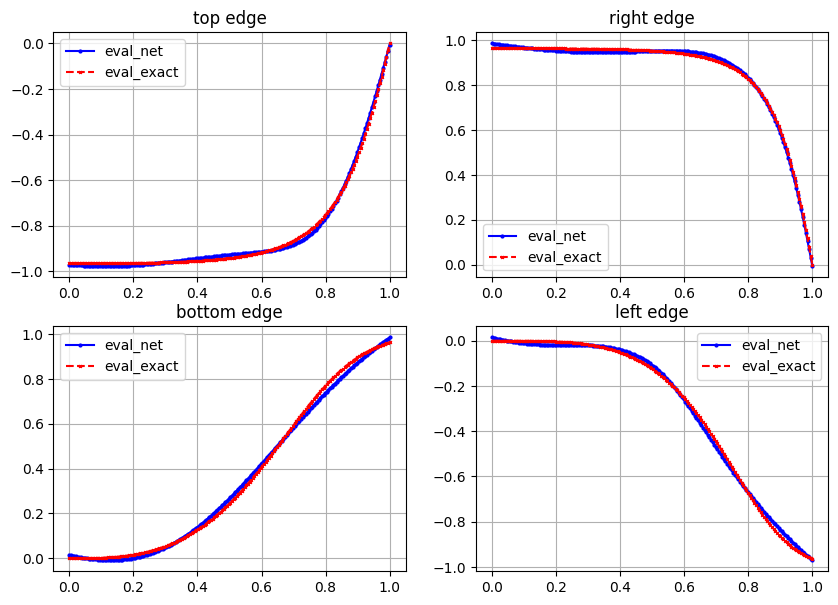

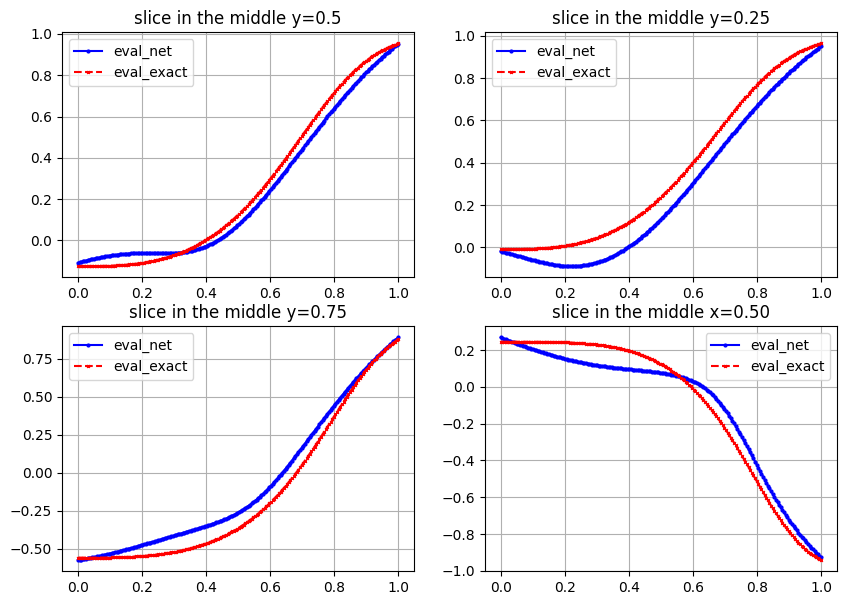

In [11]:
# Compare with the now trained network
plot_BC(pb.u_exact_np,model_np)

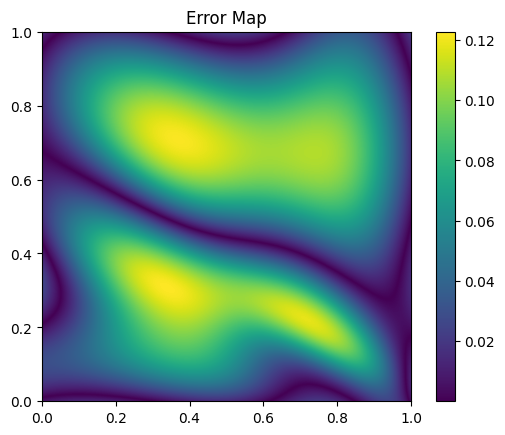

In [12]:
color_plot(bc_model)

In [13]:
# Make the bc_model non-trianable
for layer in bc_model.layers:
    layer.trainable = False

# Display model summary after making weights non-trainable
bc_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371
Trainable params: 0
Non-trainable params: 371
_________________________________________________________________


###  VPINN MODEL

In [14]:
# Create the network to be trained on the variational form
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

MODEL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 50)                150       
                                                                 
 dense_6 (Dense)             (None, 50)                2550      
                                                                 
 dense_7 (Dense)             (None, 50)                2550      
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 5,301
Trainable params: 5,301
Non-trainable params: 0
_________________________________________________________________


#### Problem parameters

In [15]:
# order of test function 
N_test = 1

params = {'scheme': 'VPINNs','N_test':N_test}





basis:
basis function number :  1

1 x^0 y^0 -1 x^1 y^0 -1 x^0 y^1 

basis function number :  2

0 x^0 y^0 1 x^1 y^0 0 x^0 y^1 

basis function number :  3

0 x^0 y^0 0 x^1 y^0 1 x^0 y^1 

basis :
d1x
basis function number :  1

-1 x^0 y^0 

d1y
basis function number :  1

-1 x^0 y^0 


d1x
basis function number :  2

1 x^0 y^0 

d1y
basis function number :  2

0 x^0 y^0 


d1x
basis function number :  3

0 x^0 y^0 

d1y
basis function number :  3

1 x^0 y^0 


basis :
d2x
basis function number :  1



d2y
basis function number :  1




d2x
basis function number :  2



d2y
basis function number :  2




d2x
basis function number :  3



d2y
basis function number :  3




degree =  1  , local dof =  3  internal dof =  0  points inside each edge =  0
[[0 0]
 [1 0]
 [0 1]]


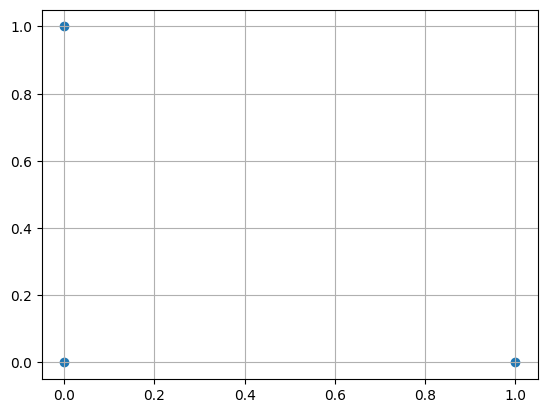

-->mesh : 
     n_triangles :  150
     n_vertices  :  88
     n_edges     :  237
     h_max           :  0.25
     h_min           :  0.0895721626833764
-->test_fun      : 
     order       :  1
     dof         :  64


In [16]:
# Initialise VPINN class
vp=VPINN(pb,params,mesh,MODEL)
model=vp.u_NN_BC

2023-11-30 04:16:29.850688: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-11-30 04:16:30.028125: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


2023-11-30 04:16:30.153969: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-11-30 04:16:30.524535: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.
2023-11-30 04:16:30.668133: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


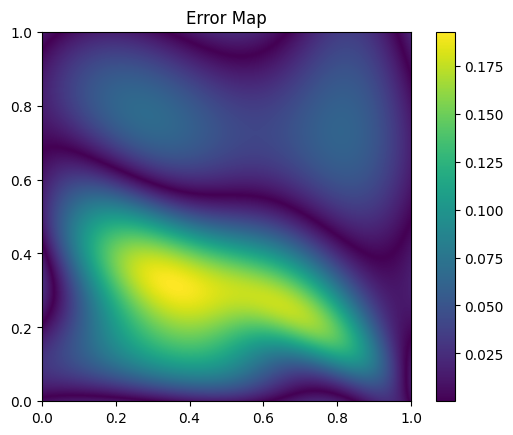

In [17]:
vp.set_bc_model(bc_model)
color_plot(vp.NN_imposeBC)

In [18]:
# Start training
history=vp.train(2000,0.001,bc_model)

2023-11-30 04:16:58.080607: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{{node gradients/gradient_tape/strided_slice_2/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_2/StridedSliceGrad/strides}}]]
2023-11-30 04:16:58.085138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/gradient_tape/strided_slice_3/StridedSliceGrad_grad/StridedSlice/gradient_tape/strided_slice_3/StridedSliceGrad/strides' with dtype int32 and shape [2]
	 [[{

Iteration: 0 loss: 0.0176300135 time: 38.00225067138672
Iteration: 10 loss: 0.0154825810 time: 0.9276034832000732
Iteration: 20 loss: 0.0135446423 time: 0.8674211502075195
Iteration: 30 loss: 0.0114998234 time: 0.8912653923034668
Iteration: 40 loss: 0.0101170267 time: 0.9153590202331543
Iteration: 50 loss: 0.0099834590 time: 0.9687647819519043
Iteration: 60 loss: 0.0098150582 time: 0.8567733764648438
Iteration: 70 loss: 0.0096029362 time: 0.8269872665405273
Iteration: 80 loss: 0.0093389035 time: 0.8087866306304932
Iteration: 90 loss: 0.0088905807 time: 0.848344087600708
Iteration: 100 loss: 0.0081454870 time: 0.8969831466674805
Iteration: 110 loss: 0.0070717310 time: 0.8667559623718262
Iteration: 120 loss: 0.0060471194 time: 0.8080077171325684
Iteration: 130 loss: 0.0056030433 time: 1.0474720001220703
Iteration: 140 loss: 0.0054594138 time: 0.8008005619049072
Iteration: 150 loss: 0.0053319687 time: 0.7271203994750977
Iteration: 160 loss: 0.0052577448 time: 0.8802225589752197
Iteration:

## Analysis

### Loss

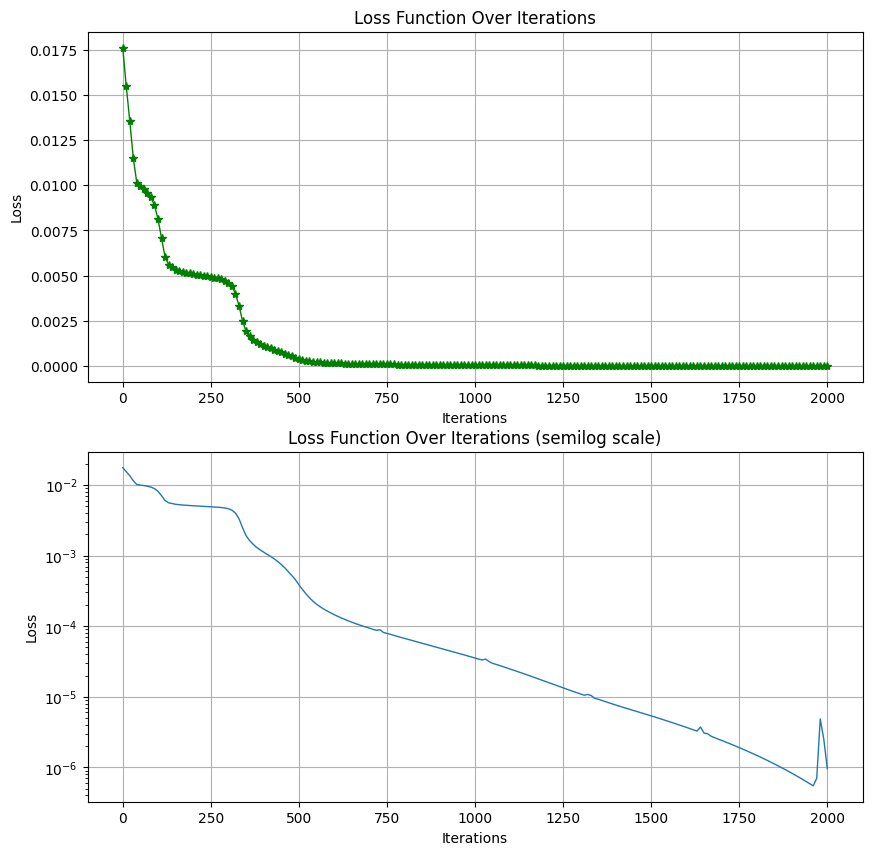

In [19]:
iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

plt.figure(figsize=(10, 10))

plt.subplot(211)
plt.plot(iterations, history, marker='*',color='green',linewidth=1)
plt.title('Loss Function Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()

plt.subplot(212)
plt.semilogy(iterations, history,linewidth=1)
plt.title('Loss Function Over Iterations (semilog scale)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid()

### Prediction

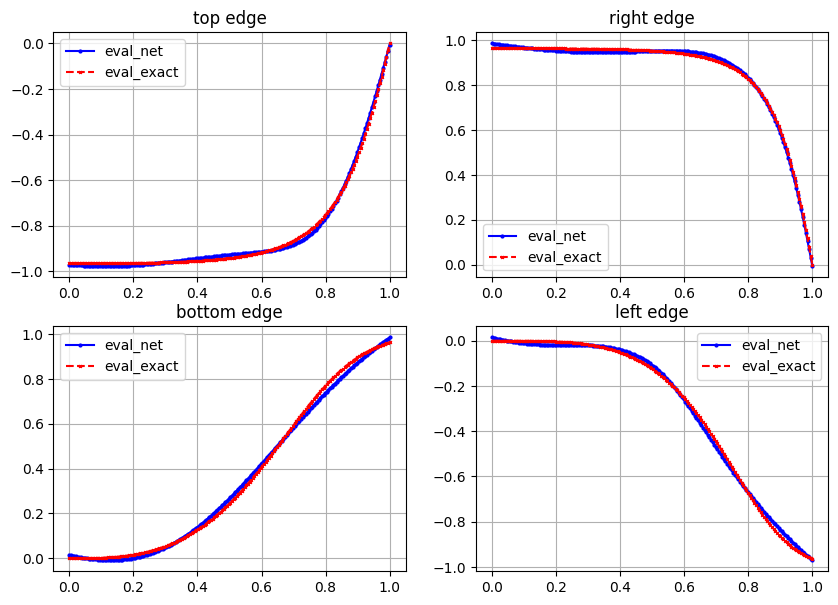

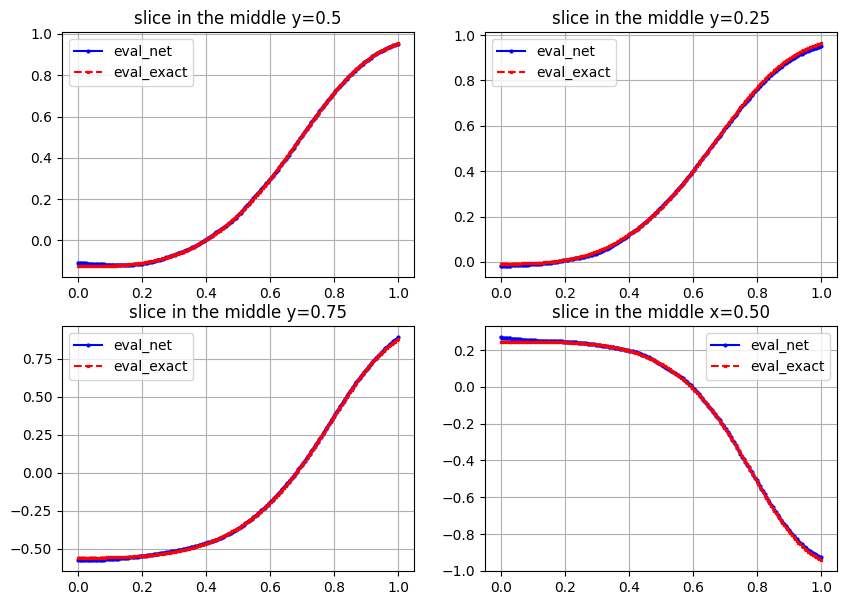

In [20]:
plot_BC(pb.u_exact_np,vp.u_NN_BC)

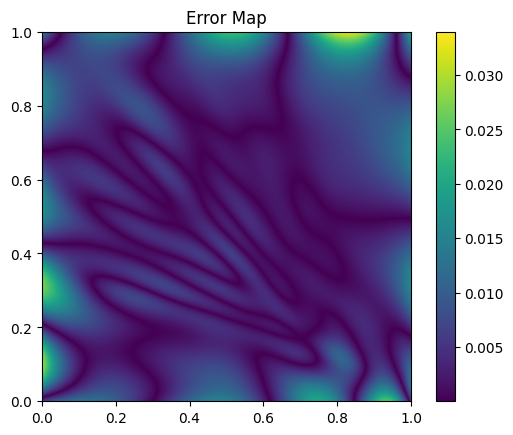

In [21]:
color_plot(vp.NN_imposeBC)

### Residuals

In [22]:
# Find the residuals over vertices and edges
if N_test == 1:
    residual_ending_vertices = vp.calc_residuals()   # r = 1 case
    vp.residual_summary(residual_ending_vertices)   # r = 1 case
elif N_test == 2:
    residual_ending_vertices, residual_ending_edges = vp.calc_residuals()  # r = 2
    vp.residual_summary(residual_ending_vertices,residual_ending_edges)  # r = 2


residual of vertices : 
-->max  =  7.942137162125299e-06
-->min  =  3.934589934604293e-11
-->mean =  4.777569561919392e-07


/home/evan/.local/lib/python3.8/site-packages/scipy/interpolate/_fitpack_impl.py:977: RuntimeWarning: No more knots can be added because the number of B-spline
coefficients already exceeds the number of data points m.
Probable causes: either s or m too small. (fp>s)
	kx,ky=1,1 nx,ny=11,12 m=88 fp=0.000000 s=0.000000
  warnings.warn(RuntimeWarning(_iermess2[ierm][0] + _mess))


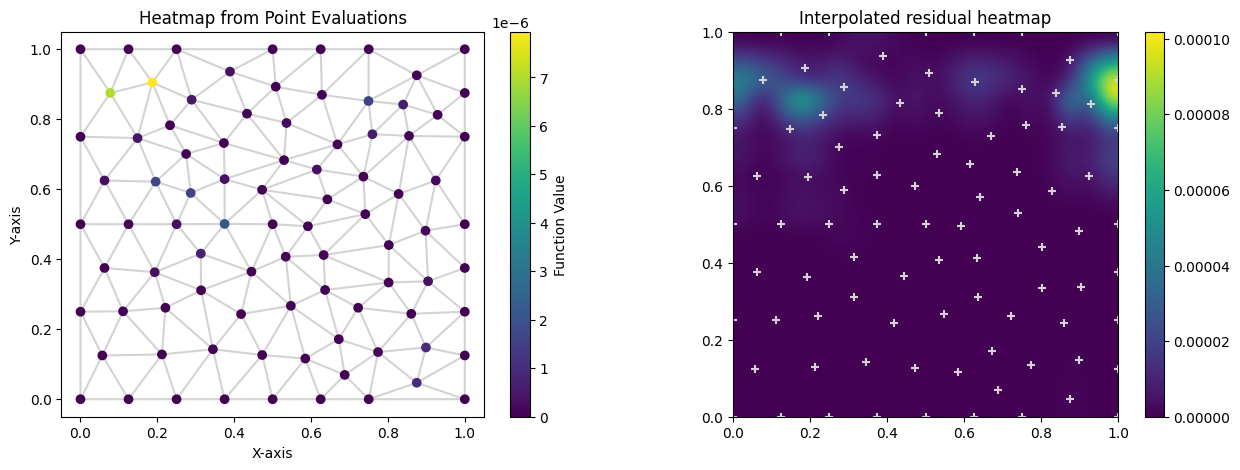

In [23]:
x = vp.mesh['vertices'][:,0]
y = vp.mesh['vertices'][:,1]

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.triplot(
    x,
    y, color='lightgrey'
)
scatter = plt.scatter(x, y, c=residual_ending_vertices, cmap='viridis', marker='o')

plt.colorbar(scatter, label='Function Value')
plt.title('Heatmap from Point Evaluations')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

import scipy.interpolate as sp

f = sp.interp2d(x, y, residual_ending_vertices, kind="linear")

# from pylab import figure, cm
from matplotlib.colors import LogNorm

x_coords = np.linspace(0, 1, 20)
z_coords = np.linspace(0, 1, 20)
c_i = np.abs(f(x_coords, z_coords))

plt.subplot(122)
fig = plt.imshow(
    c_i,
    extent=[min(x), max(x), min(y), max(y)],
    origin="lower",
    interpolation="bicubic",
    # norm=LogNorm(vmin = np.min(c_i), vmax=np.max(c_i))
)
plt.title('Interpolated residual heatmap')
plt.scatter(x, y, color='lightgrey', marker='+')
plt.colorbar(fig)

### H1 and L2 error

In [41]:
# Get quad pairs
from numpy.polynomial import legendre


def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)

    nodes=(nodes+1.0)/2.0


    # Nodes=np.array([nodes],dtype=np_type)

    Weights=np.array([weights],dtype=np_type)/2.0
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))

    x, y =np.meshgrid(nodes,nodes)
    x = x.flatten()
    y = y.flatten()

    xy = np.reshape([x,y], (-1,2))

    return xy, w




In [49]:
# from PROBDEF import PROBDEF
# pb = PROBDEF()

from importlib import reload
import PROBDEF  # Replace 'your_module' with the actual name of your module

# Make changes to your_module

# Reload the module to apply the changes
reload(PROBDEF)

pb = PROBDEF.PROBDEF()

settings_lib imported 




In [54]:
def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))

def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.reshape(np.vstack([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])]), (-1, 2))


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = pw_diff[:,0]*pw_diff[:,0] + pw_diff[:,1]*pw_diff[:,1]

    # print(pw_diff)


    # Return dx_error^2 + dy_error^2
    return np.sqrt(np.sum(pw_diff*w))

In [55]:
# xy, w = get_quad_rule(30)
# a = L2_error(xy,w)

# # print(sum(w))

# print(a)

# b = semi_H1_error(xy,w)

# print(b)


0.006332677967732779
205.18365832569484


In [27]:
#integration
# from scipy.integrate import dblquad

# def L2_error(x, y):

#     # Find the exact solution
#     u_ex = pb.u_exact_np(x, y)

#     # Find the NN solution
#     u_NN = vp.u_NN_BC(x, y)

#     # Find the difference between exact and NN 
#     return (u_ex - u_NN)**2

# L2_2, int_error_L2 = dblquad(L2_error, 0.0, 1.0, 0.0, 1.0, epsabs=5E-6)
# L2_error=np.sqrt(L2_2)

In [28]:
# def semi_H1_error(x, y):

#     # Find the gradient of the exact solution
#     grad_ex = np.reshape(np.vstack([pb.dudx(x, y), pb.dudy(x, y)]), (-1, 2))

#     # Find the gradient of the NN solution
#     grad_NN = vp.eval_grad_NN_BC(tf.constant([[x,y]], dtype=tf_type))

#     # Find the difference between exact and NN 
#     pw_diff = grad_ex - grad_NN

#     # Return dx_error^2 + dy_error^2
#     return (pw_diff[:,0]*pw_diff[:,0] + pw_diff[:,1]*pw_diff[:,1]).numpy()[0]

In [56]:
xy, w = get_quad_rule(30)

semi_H1_err = semi_H1_error(xy, w)
L2_error = L2_error(xy, w)
H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

print(f"L2 error: {L2_error}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")


L2 error: 0.006332677967732779
semi H1 error: 205.18365832569484
H1 error: 205.18365842341902


### H1 and L2 convergence

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

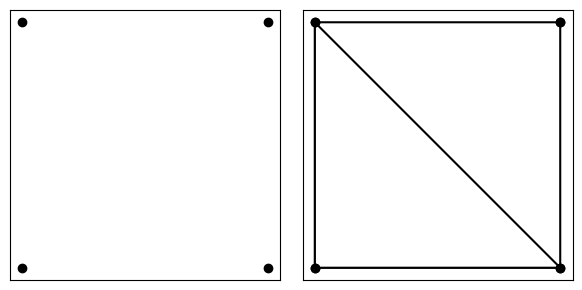

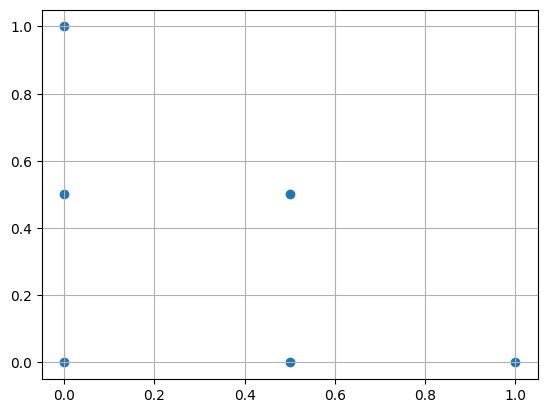

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

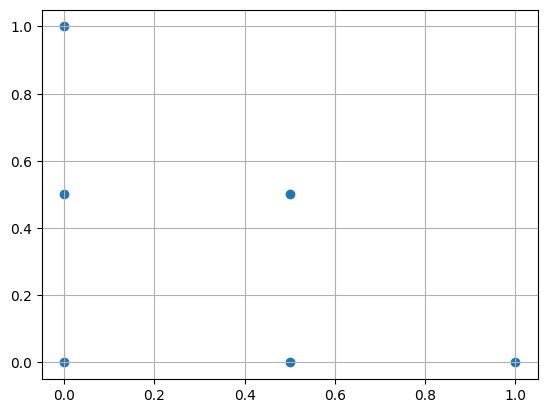

-->mesh : 
     n_triangles :  2
     n_vertices  :  4
     n_edges     :  5
     h_max           :  1.4142135623730951
     h_min           :  1.0
-->test_fun      : 
     order       :  2
     dof         :  1
Iteration: 0 loss: 102.3721624233 time: 0.9978482723236084
Iteration: 10 loss: 44.4887144707 time: 0.009756803512573242
Iteration: 20 loss: 11.0346099579 time: 0.010465383529663086
Iteration: 30 loss: 0.6883418770 time: 0.009124755859375
Iteration: 40 loss: 0.2027919515 time: 0.01006460189819336
Iteration: 50 loss: 0.5127501124 time: 0.010184288024902344
Iteration: 60 loss: 0.2036813099 time: 0.00870823860168457
Iteration: 70 loss: 0.0113568978 time: 0.01012873649597168
Iteration: 80 loss: 0.0068847473 time: 0.008636474609375
Iteration: 90 loss: 0.0102878704 time: 0.010614156723022461
Iteration: 100 loss: 0.0017856742 time: 0.010565519332885742
Iteration: 110 loss: 0.0000646116 time: 0.00838327407836914
Iteration: 120 loss: 0.0004214745 time: 0.01049351692199707
Iteration: 130 

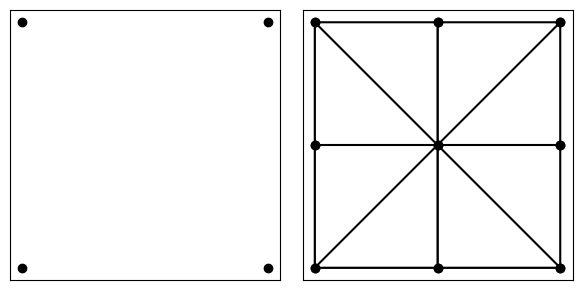

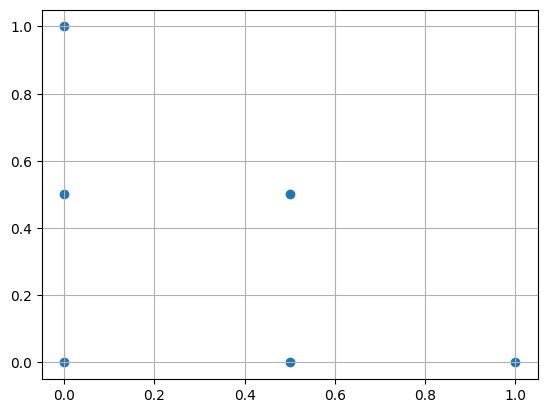

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

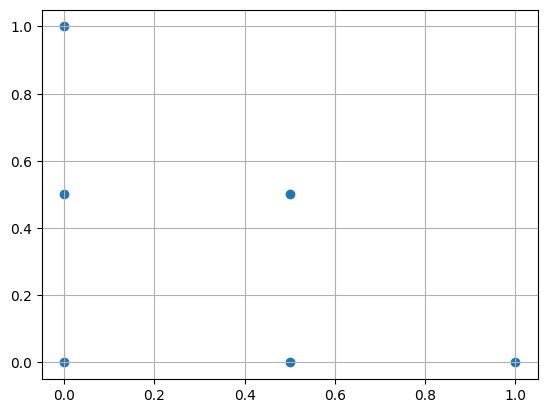

-->mesh : 
     n_triangles :  8
     n_vertices  :  9
     n_edges     :  16
     h_max           :  0.7071067811865476
     h_min           :  0.5
-->test_fun      : 
     order       :  2
     dof         :  9
Iteration: 0 loss: 4.4389883978 time: 1.7354214191436768
Iteration: 10 loss: 2.0172524757 time: 0.015149593353271484
Iteration: 20 loss: 0.6801321067 time: 0.014130353927612305
Iteration: 30 loss: 0.2694131323 time: 0.014528751373291016
Iteration: 40 loss: 0.2228522297 time: 0.014537811279296875
Iteration: 50 loss: 0.1976346182 time: 0.01411294937133789
Iteration: 60 loss: 0.1655511629 time: 0.012570619583129883
Iteration: 70 loss: 0.1489485175 time: 0.01383829116821289
Iteration: 80 loss: 0.1404716194 time: 0.013703584671020508
Iteration: 90 loss: 0.1330109140 time: 0.014332294464111328
Iteration: 100 loss: 0.1268403077 time: 0.014200687408447266
Iteration: 110 loss: 0.1219753557 time: 0.014933347702026367
Iteration: 120 loss: 0.1178765040 time: 0.016337156295776367
Iteration

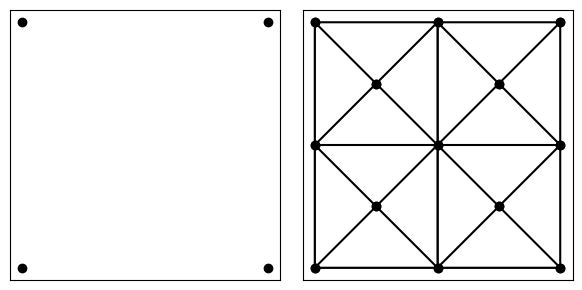

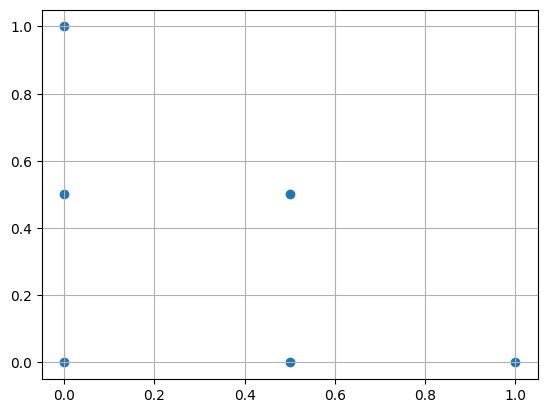

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

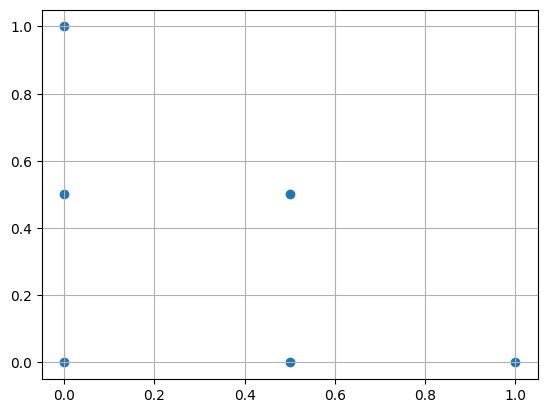

-->mesh : 
     n_triangles :  16
     n_vertices  :  13
     n_edges     :  28
     h_max           :  0.5
     h_min           :  0.3535533905932738
-->test_fun      : 
     order       :  2
     dof         :  25
Iteration: 0 loss: 0.9843306808 time: 2.7827060222625732
Iteration: 10 loss: 0.4528937752 time: 0.019398927688598633
Iteration: 20 loss: 0.1594255125 time: 0.018969297409057617
Iteration: 30 loss: 0.0683094890 time: 0.02029275894165039
Iteration: 40 loss: 0.0567899808 time: 0.01889204978942871
Iteration: 50 loss: 0.0508107954 time: 0.018882274627685547
Iteration: 60 loss: 0.0437788711 time: 0.018691301345825195
Iteration: 70 loss: 0.0401673414 time: 0.018942832946777344
Iteration: 80 loss: 0.0383301085 time: 0.018639326095581055
Iteration: 90 loss: 0.0367341384 time: 0.018976211547851562
Iteration: 100 loss: 0.0354261474 time: 0.0215914249420166
Iteration: 110 loss: 0.0343974447 time: 0.0233767032623291
Iteration: 120 loss: 0.0335288732 time: 0.022554636001586914
Iteration:

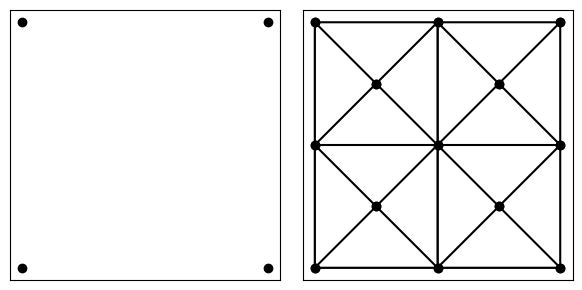

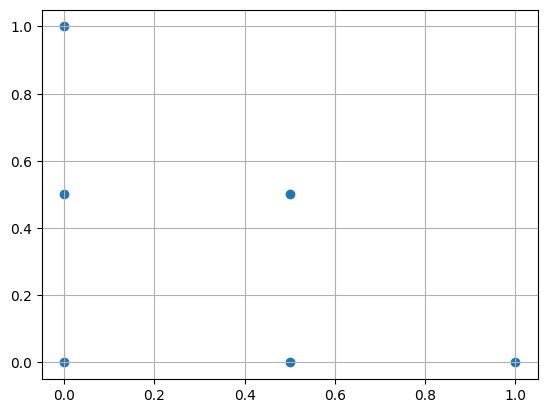

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

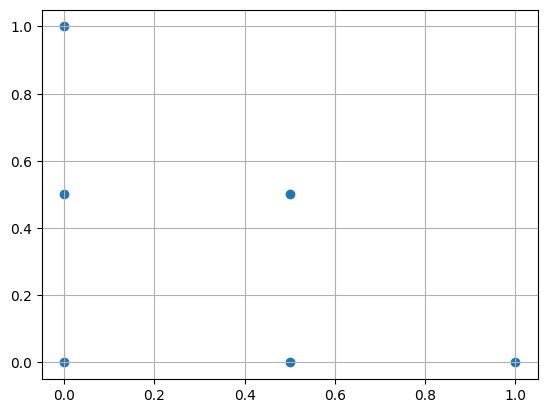

-->mesh : 
     n_triangles :  16
     n_vertices  :  13
     n_edges     :  28
     h_max           :  0.5
     h_min           :  0.3535533905932738
-->test_fun      : 
     order       :  2
     dof         :  25
Iteration: 0 loss: 0.9843306808 time: 3.0840559005737305
Iteration: 10 loss: 0.4528937752 time: 0.020264863967895508
Iteration: 20 loss: 0.1594255125 time: 0.019162893295288086
Iteration: 30 loss: 0.0683094890 time: 0.019178152084350586
Iteration: 40 loss: 0.0567899808 time: 0.0189361572265625
Iteration: 50 loss: 0.0508107954 time: 0.020186185836791992
Iteration: 60 loss: 0.0437788711 time: 0.02028203010559082
Iteration: 70 loss: 0.0401673414 time: 0.018990516662597656
Iteration: 80 loss: 0.0383301085 time: 0.019477128982543945
Iteration: 90 loss: 0.0367341384 time: 0.0190887451171875
Iteration: 100 loss: 0.0354261474 time: 0.01963043212890625
Iteration: 110 loss: 0.0343974447 time: 0.024959325790405273
Iteration: 120 loss: 0.0335288732 time: 0.02277541160583496
Iteration: 

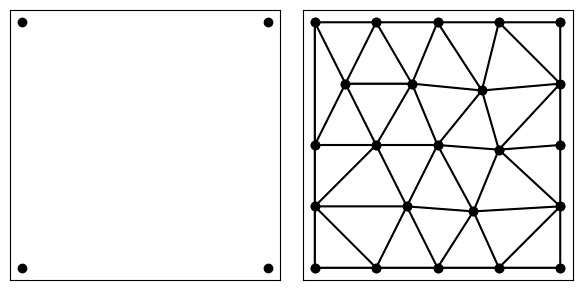

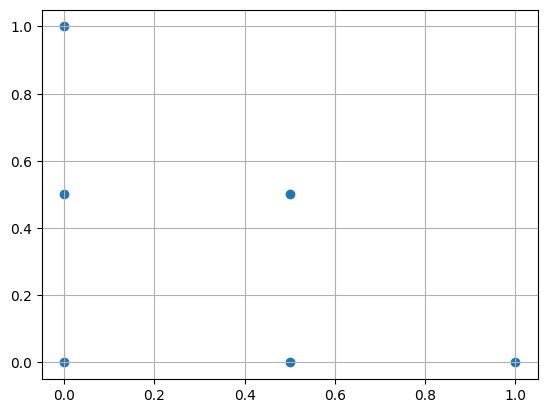

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

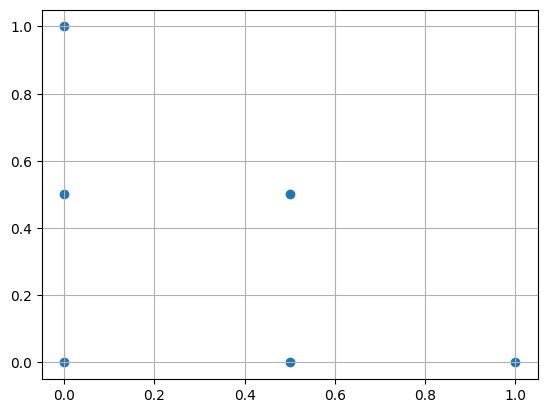

-->mesh : 
     n_triangles :  29
     n_vertices  :  23
     n_edges     :  51
     h_max           :  0.5
     h_min           :  0.25
-->test_fun      : 
     order       :  2
     dof         :  44
Iteration: 0 loss: 0.3203857604 time: 4.943252801895142
Iteration: 10 loss: 0.1489856823 time: 0.030299663543701172
Iteration: 20 loss: 0.0546821400 time: 0.028949260711669922
Iteration: 30 loss: 0.0255859561 time: 0.02795886993408203
Iteration: 40 loss: 0.0216971240 time: 0.029015541076660156
Iteration: 50 loss: 0.0195642123 time: 0.029985904693603516
Iteration: 60 loss: 0.0172533218 time: 0.028778791427612305
Iteration: 70 loss: 0.0160879319 time: 0.028667211532592773
Iteration: 80 loss: 0.0154808048 time: 0.031093358993530273
Iteration: 90 loss: 0.0149540368 time: 0.02982783317565918
Iteration: 100 loss: 0.0145252922 time: 0.03135967254638672
Iteration: 110 loss: 0.0141858421 time: 0.03532838821411133
Iteration: 120 loss: 0.0138969487 time: 0.035375356674194336
Iteration: 130 loss: 0.

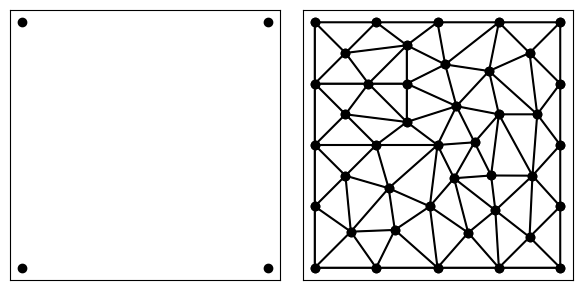

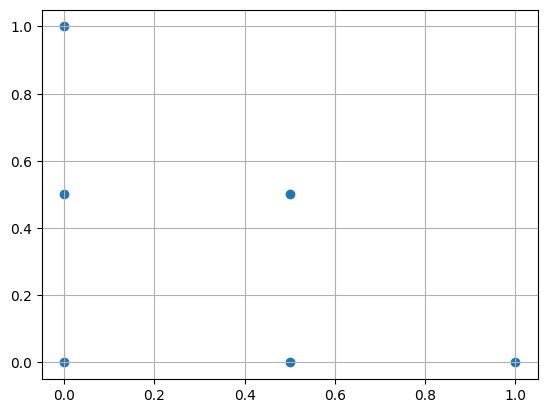

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

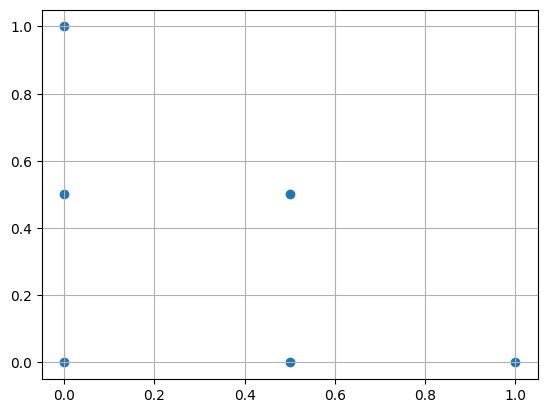

-->mesh : 
     n_triangles :  66
     n_vertices  :  42
     n_edges     :  107
     h_max           :  0.2850357380931555
     h_min           :  0.14330711250516706
-->test_fun      : 
     order       :  2
     dof         :  117
Iteration: 0 loss: 0.0540448724 time: 10.170297384262085
Iteration: 10 loss: 0.0255165640 time: 0.06032609939575195
Iteration: 20 loss: 0.0098428249 time: 0.05758047103881836
Iteration: 30 loss: 0.0049376433 time: 0.05915212631225586
Iteration: 40 loss: 0.0042242410 time: 0.06001925468444824
Iteration: 50 loss: 0.0038524124 time: 0.059351444244384766
Iteration: 60 loss: 0.0034704037 time: 0.06113457679748535
Iteration: 70 loss: 0.0032785065 time: 0.05732560157775879
Iteration: 80 loss: 0.0031756774 time: 0.06267833709716797
Iteration: 90 loss: 0.0030852384 time: 0.06346487998962402
Iteration: 100 loss: 0.0030105764 time: 0.058768272399902344
Iteration: 110 loss: 0.0029494533 time: 0.07541489601135254
Iteration: 120 loss: 0.0028955714 time: 0.07545042037963

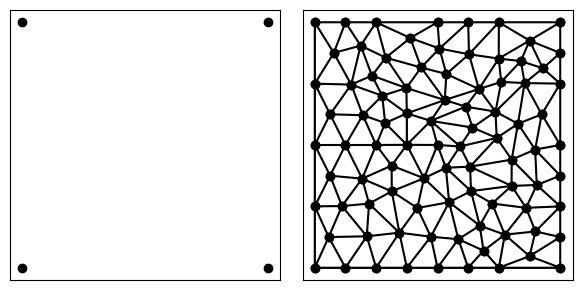

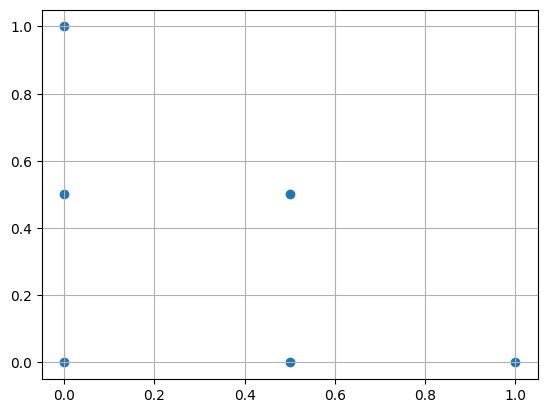

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

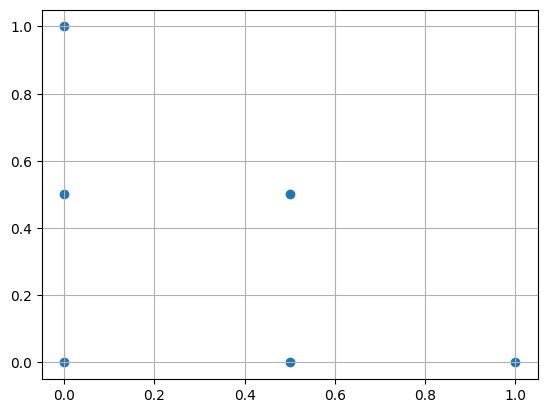

-->mesh : 
     n_triangles :  150
     n_vertices  :  88
     n_edges     :  237
     h_max           :  0.25
     h_min           :  0.0895721626833764
-->test_fun      : 
     order       :  2
     dof         :  277
Iteration: 0 loss: 0.0101664013 time: 24.52495265007019
Iteration: 10 loss: 0.0048388282 time: 0.14742803573608398
Iteration: 20 loss: 0.0018966721 time: 0.14605093002319336
Iteration: 30 loss: 0.0009470426 time: 0.14672017097473145
Iteration: 40 loss: 0.0008016605 time: 0.17583322525024414
Iteration: 50 loss: 0.0007375858 time: 0.17564749717712402
Iteration: 60 loss: 0.0006712132 time: 0.15656661987304688
Iteration: 70 loss: 0.0006383468 time: 0.14742183685302734
Iteration: 80 loss: 0.0006219531 time: 0.14899826049804688
Iteration: 90 loss: 0.0006074836 time: 0.1475505828857422
Iteration: 100 loss: 0.0005953205 time: 0.15245318412780762
Iteration: 110 loss: 0.0005851716 time: 0.16741275787353516
Iteration: 120 loss: 0.0005759297 time: 0.16659927368164062
Iteration: 130

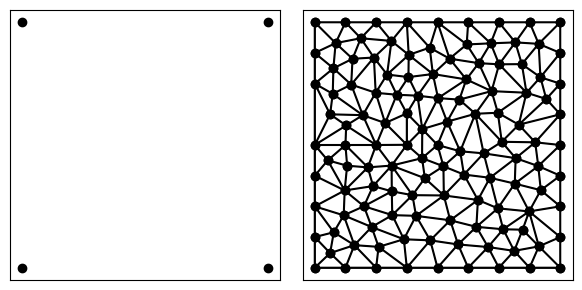

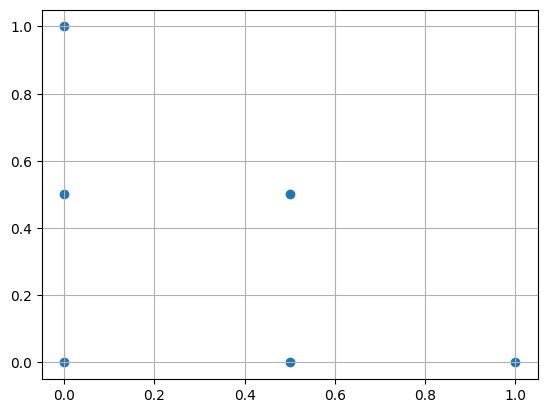

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

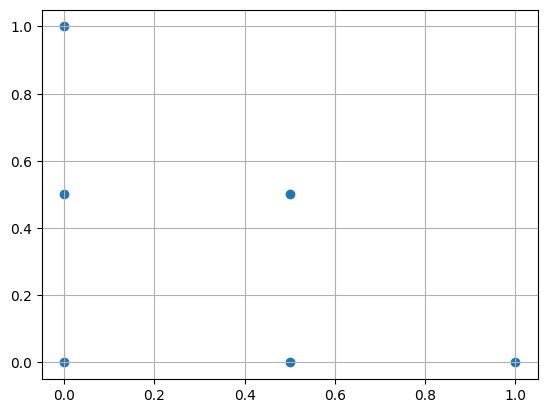

-->mesh : 
     n_triangles :  207
     n_vertices  :  120
     n_edges     :  326
     h_max           :  0.25
     h_min           :  0.07908482369983984
-->test_fun      : 
     order       :  2
     dof         :  384
Iteration: 0 loss: 0.0054580847 time: 33.85343933105469
Iteration: 10 loss: 0.0025611099 time: 0.22068166732788086
Iteration: 20 loss: 0.0009970965 time: 0.21990346908569336
Iteration: 30 loss: 0.0005252049 time: 0.22619009017944336
Iteration: 40 loss: 0.0004536652 time: 0.22219300270080566
Iteration: 50 loss: 0.0004121586 time: 0.22367548942565918
Iteration: 60 loss: 0.0003732784 time: 0.22356343269348145
Iteration: 70 loss: 0.0003545125 time: 0.22155284881591797
Iteration: 80 loss: 0.0003443645 time: 0.22167468070983887
Iteration: 90 loss: 0.0003354979 time: 0.2227928638458252
Iteration: 100 loss: 0.0003282761 time: 0.22905349731445312
Iteration: 110 loss: 0.0003223434 time: 0.24936485290527344
Iteration: 120 loss: 0.0003170591 time: 0.2504911422729492
Iteration: 13

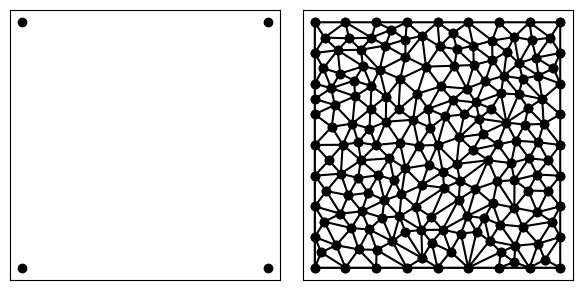

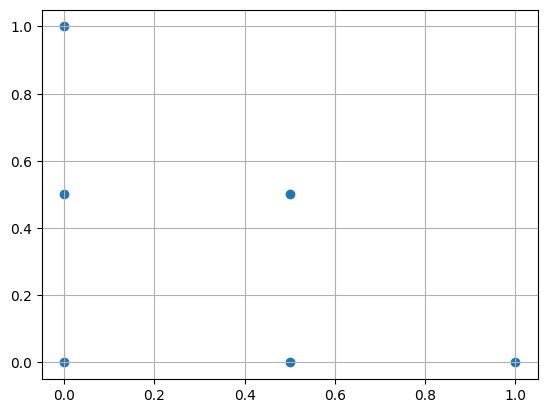

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

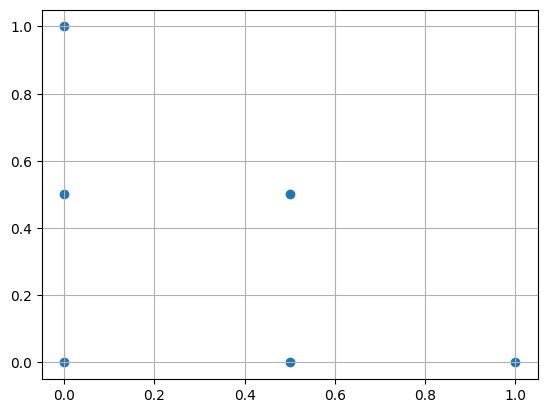

-->mesh : 
     n_triangles :  319
     n_vertices  :  177
     n_edges     :  495
     h_max           :  0.1500397304820275
     h_min           :  0.0625
-->test_fun      : 
     order       :  2
     dof         :  606
Iteration: 0 loss: 0.0023728833 time: 54.744717597961426
Iteration: 10 loss: 0.0011315861 time: 0.4243612289428711
Iteration: 20 loss: 0.0004425612 time: 0.4274444580078125
Iteration: 30 loss: 0.0002217885 time: 0.4097938537597656
Iteration: 40 loss: 0.0001893038 time: 0.41292381286621094
Iteration: 50 loss: 0.0001748407 time: 0.4131162166595459
Iteration: 60 loss: 0.0001592265 time: 0.4146902561187744
Iteration: 70 loss: 0.0001513159 time: 0.4133317470550537
Iteration: 80 loss: 0.0001473834 time: 0.4168212413787842
Iteration: 90 loss: 0.0001439381 time: 0.41645336151123047
Iteration: 100 loss: 0.0001410258 time: 0.4260599613189697
Iteration: 110 loss: 0.0001386040 time: 0.46072840690612793
Iteration: 120 loss: 0.0001364048 time: 0.4652669429779053
Iteration: 130 los

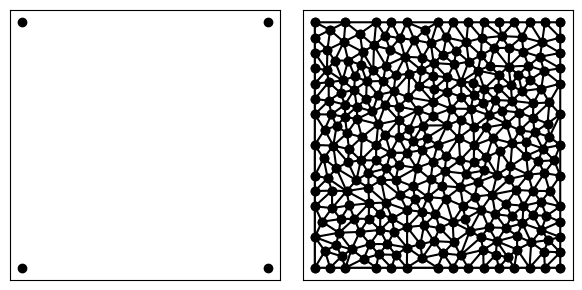

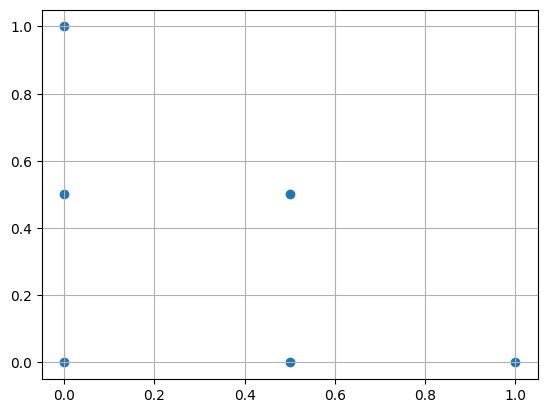

basis:
basis function number :  1

1 x^0 y^0 -3 x^1 y^0 2 x^2 y^0 -3 x^0 y^1 4 x^1 y^1 2 x^0 y^2 

basis function number :  2

0 x^0 y^0 4 x^1 y^0 -4 x^2 y^0 0 x^0 y^1 -4 x^1 y^1 0 x^0 y^2 

basis function number :  3

0 x^0 y^0 -1 x^1 y^0 2 x^2 y^0 0 x^0 y^1 0 x^1 y^1 0 x^0 y^2 

basis function number :  4

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 4 x^0 y^1 -4 x^1 y^1 -4 x^0 y^2 

basis function number :  5

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 0 x^0 y^1 4 x^1 y^1 0 x^0 y^2 

basis function number :  6

0 x^0 y^0 0 x^1 y^0 0 x^2 y^0 -1 x^0 y^1 0 x^1 y^1 2 x^0 y^2 

basis :
d1x
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 

d1y
basis function number :  1

-3 x^0 y^0 4 x^1 y^0 4 x^0 y^1 


d1x
basis function number :  2

4 x^0 y^0 -8 x^1 y^0 -4 x^0 y^1 

d1y
basis function number :  2

0 x^0 y^0 -4 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  3

-1 x^0 y^0 4 x^1 y^0 0 x^0 y^1 

d1y
basis function number :  3

0 x^0 y^0 0 x^1 y^0 0 x^0 y^1 


d1x
basis function number :  4

0 x^0 y^0 0 

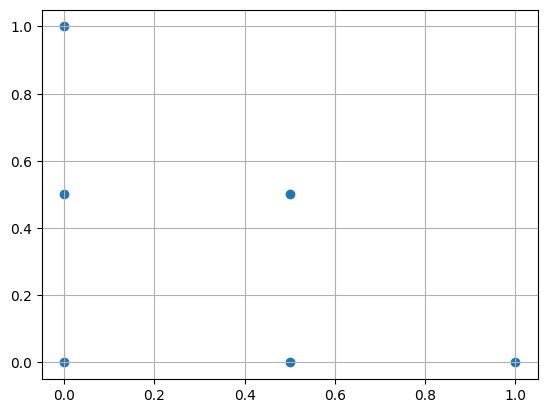

-->mesh : 
     n_triangles :  525
     n_vertices  :  289
     n_edges     :  813
     h_max           :  0.125
     h_min           :  0.04922547486780172
-->test_fun      : 
     order       :  2
     dof         :  1000


KeyboardInterrupt: 

In [ ]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

xy, w = get_quad_rule(30)

H1 = []
L2 = []
semi = []
h = []
for refinement in [0.5, 0.2, 0.1, 0.075, 0.05, 0.025, 0.01, 0.008, 0.005, 0.003]:
    model = restart_model()
    mesh=generate_mesh(domain,refinement)
    vp=VPINN(pb,params,mesh,model)
    history=vp.train(1000, 0.001)

    integral,error=dblquad(lambda x,y: (pb.u_exact(x,y)-vp.u_NN_BC(x,y))**2, 0.0, 1.0,0.0, 1.0)

    L2_error=np.sqrt(integral)

    semi_H1_err2, int_error_semi_H1 = dblquad(semi_H1_error, 0.0, 1.0, 0.0, 1.0, epsabs=1E-5)
    semi_H1_err = np.sqrt(semi_H1_err2)
    H1_err = np.sqrt(L2_error**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error)
    a, b = find_hs(mesh)
    h.append(0.5*a + 0.5*b)
    
    

In [ ]:
h = np.array(h)

H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)

H1 rate: 1.2736676487331193
L2 rate: 1.4776942334720964


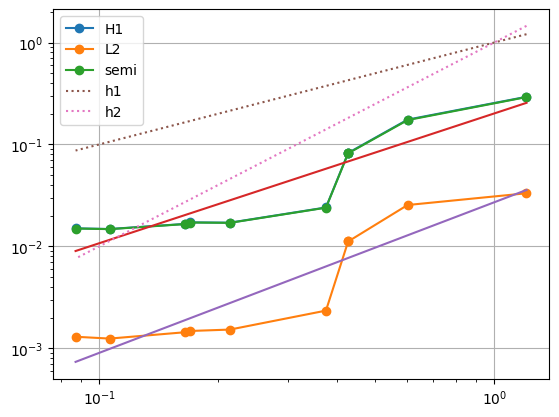

In [ ]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
polynomial = np.poly1d(coeffs)
log10_H1_fit = polynomial(np.log10(h))

print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")

plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_H1_fit)
plt.loglog(h, 10**log10_L2_fit)
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.grid()
plt.legend()